In [94]:
[print(f"{key}: {value}") for key, value in plt.rcParams.items() if value == 'white'];

axes.edgecolor: white
axes.labelcolor: white
boxplot.boxprops.color: white
boxplot.capprops.color: white
boxplot.flierprops.color: white
boxplot.flierprops.markeredgecolor: white
boxplot.whiskerprops.color: white
grid.color: white
lines.color: white
patch.edgecolor: white
text.color: white


In [103]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'

In [104]:
x = np.linspace(0, 10, 100)

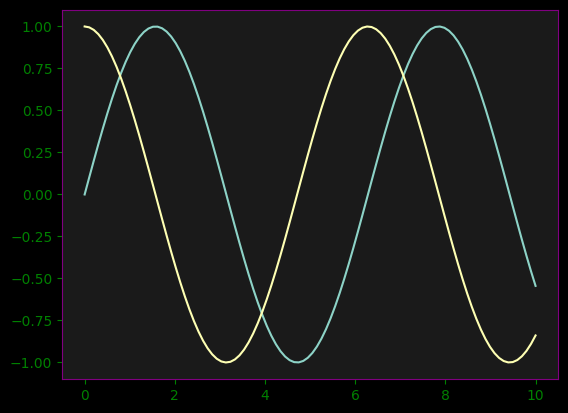

In [105]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.savefig('my_figure.png')

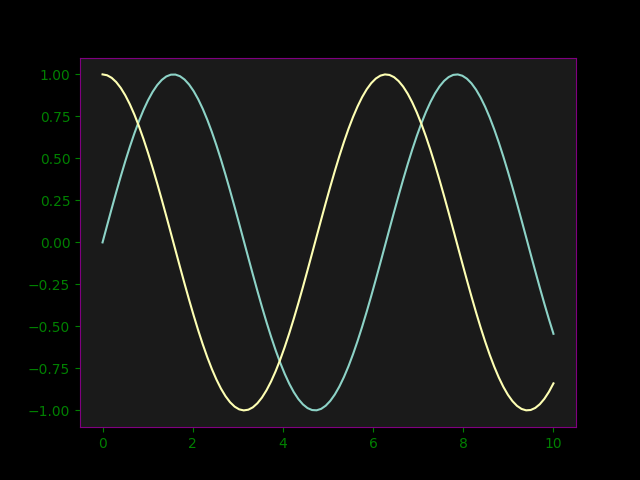

In [106]:
Image('my_figure.png')

In [107]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

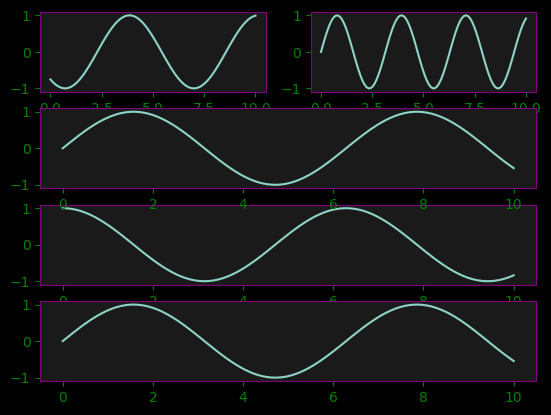

In [108]:
plt.figure()

plt.subplot(4,2,1) #(rows, columns, panel number)
plt.plot(x, np.sin(4+x))

plt.subplot(422)
plt.plot(x, np.sin(2*x))

plt.subplot(413)#you might aswell just omit comma
plt.plot(x, np.cos(x))

plt.subplot(412)
plt.plot(x, np.sin(x))

plt.subplot(414)
plt.plot(x, np.sin(x));

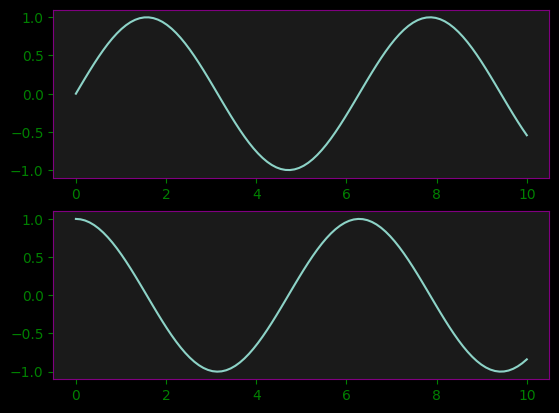

In [109]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

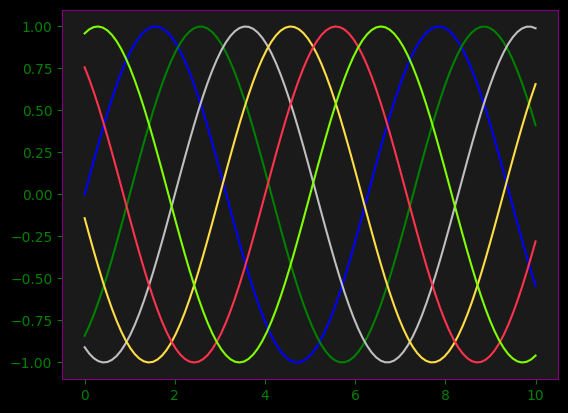

In [110]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

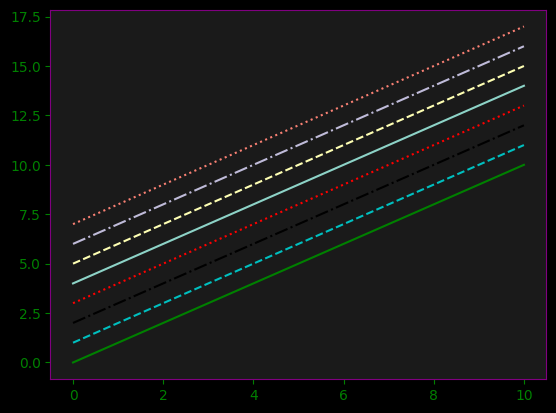

In [112]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

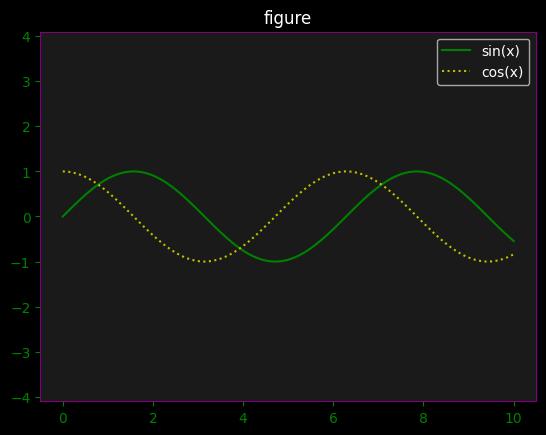

In [117]:
plt.title('figure')
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':y', label='cos(x)')
plt.axis('equal')

plt.legend();